# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [6]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv("terrain.csv")

In [4]:
# inputs: lo abrupto del terrno y la inclinación del terreno
# output: 0 o 1, acelero o freno
X = df[["bumpiness","grade"]].values
y = df["target"]

In [31]:
# esta función la ha creado el profe para visualizar los datos después pero no es necesario
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

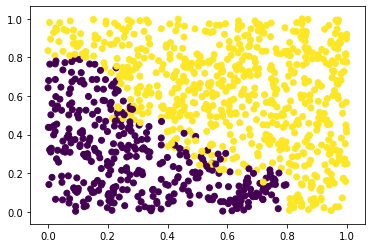

In [7]:
# dibujo en x e y el bumpiness y el grade
# uso la variable output para colorear
plt.scatter(df["bumpiness"],df["grade"], c=df["target"]);

## Logistic Regression

In [8]:
# Load the library
from sklearn.linear_model import LogisticRegression

In [9]:
# Create an instance of the classifier
clf=LogisticRegression()

In [14]:
# creamos nuestro train set y test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)

In [13]:
# Fit the data
clf.fit(X_train,y_train)

/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# necesitamos valorear nuestro modelo
# usamos una métrica

## Accuracy

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# saco el Accuracy
accuracy_score(y_test,clf.predict(X_test))
# Saco un accuracy mejor con Cross Validation
cvs = cross_val_score(clf,X,y,scoring="accuracy", cv=5)
cvs

/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

array([0.91044776, 0.92537313, 0.93      , 0.90954774, 0.92462312])

In [22]:
# quiero la media de los 5 valores
np.mean(cvs)
# sale un accuracy del 92%

0.919998349958749

## K Neighbour Classification

In [24]:
# Load the library
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Create an instance 
regk = KNeighborsClassifier(n_neighbors=5)

In [26]:
# Fit the data 
regk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

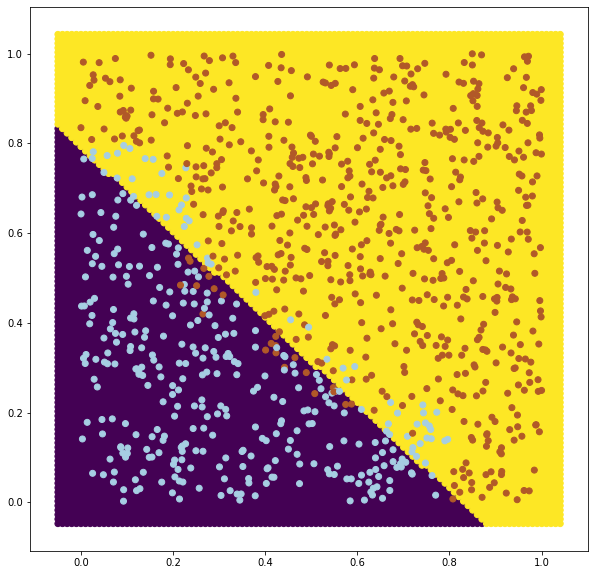

In [33]:
draw(clf, X, y, h=0.01)

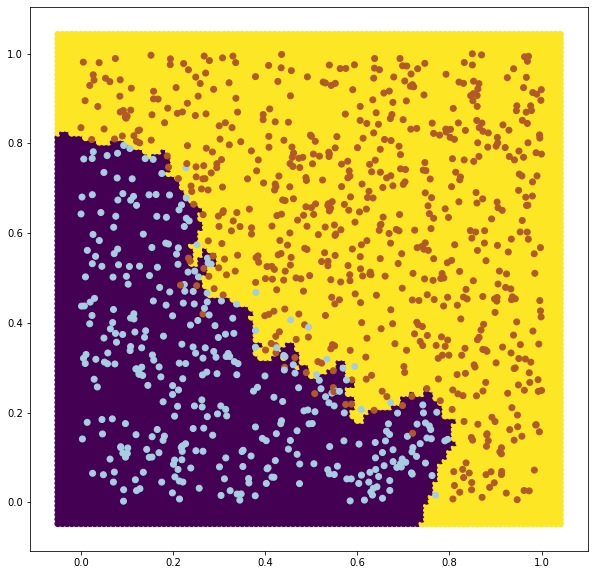

In [34]:
draw(regk, X, y, h=0.01)
# mi modleo k vecinos se ajusta más pero tiene pinta de estar overfit
# se está ajustando genial a lo que ve, pero no está generalizando

## Precision and Recall

In [35]:
# Metrics
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, clf.predict(X_test))


/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angelrps/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:19

array([0.94907407, 0.97685185, 0.96744186])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

precision_score(y_test,clf.predict(X_test))
classification_report(y_test,clf.predict(X_test))
# Cross Validation
cross_val_score(clf,X,y,scoring="precision")
cross_val_score(clf,X,y,scoring="recall")

In [39]:
from sklearn.metrics import confusion_matrix

 # Ejercicio

Entrenar un Decision Tree con el dataset de los coches y hayar el mejor modelo ysando AUC como métrica

In [41]:
# Import library
from sklearn.tree import DecisionTreeClassifier

In [42]:
# creamos nuestro train set y test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)

In [43]:
# Create instance
# ejer_dtc = DecisionTreeClassifier(min_samples_leaf=20,max_depth=3)

In [51]:
from sklearn.model_selection import GridSearchCV
ejer_dtc = GridSearchCV(DecisionTreeClassifier(),
                       param_grid={"max_depth":np.arange(2,30),
                                  "min_samples_leaf":arange(20,100,10)},
                       cv=5,
                        scoring="roc_auc")

In [52]:
# Fit the data
ejer_dtc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 

In [55]:
ejer_dtc.best_params_, ejer_dtc.best_score_

({'max_depth': 17, 'min_samples_leaf': 20}, 0.9851047689296378)

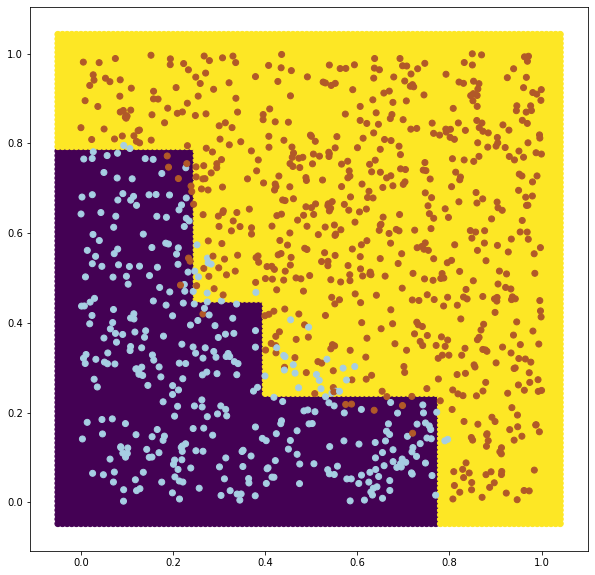

In [56]:
draw(ejer_dtc, X, y, h=0.01)
# Ojo aunque max_depth sale 17 en realidad no ha necesitado llegar a 17.
# max_depth significa que como máximo le dejo hacer 17 divisiones, pero se puede quedar antes.
# Se ha quedado en 3, vemos los 3 steps en el dibujo